# Introduction
ETS models decompose a time series into three components: error, trend, and seasonality. These models are commonly used when the data exhibits a trend and/or seasonality and when there is noise or random variation present.<br>

* Error (E): The random or irregular component of the time series that cannot be explained by the trend or seasonality.

* Trend (T): The long-term movement or direction of the time series. It captures gradual changes or patterns over time.

* Seasonality (S): The repeating pattern or fluctuation in the time series that occurs at regular intervals, such as daily, weekly, or monthly.


**NOTE: we will work with store number 4.**



# Import needed libraries 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [16]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import warnings
warnings.filterwarnings('ignore')

# Load and Preprocess Data

In [17]:
# Load the data
train = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
store = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')

In [18]:
# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])

In [19]:
# Set Date as the index
train.set_index('Date', inplace=True)

In [22]:
# Filter data for a specific store (e.g., Store 1)
store_4_data = train[train['Store'] == 4]

In [23]:
# Sort data by date
store_4_data.sort_index(inplace=True)

# Train-Test Split

In [24]:
train_size = int(len(store_4_data) * 0.8)
train_data, test_data =store_4_data.iloc[:train_size], store_4_data.iloc[train_size:]

# Define RMSPE function with handling for zero values

In [25]:
def rmspe(y_true, y_pred):
    mask = y_true != 0
    return np.sqrt(np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask])))


# Apply ETS Model
from previous analysis >>> (A,A,A) is sutable for weekly seasonality with this strore.

In [39]:
# Fit the ETS model
ets_model = ETSModel(train_data['Sales'], error='add', trend='add', seasonal='add', seasonal_periods=7)  
ets_fit = ets_model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65932D+00    |proj g|=  9.88789D-01

At iterate    1    f=  9.53098D+00    |proj g|=  6.10559D-01

At iterate    2    f=  9.44596D+00    |proj g|=  4.82641D-01

At iterate    3    f=  9.33761D+00    |proj g|=  2.85765D-01

At iterate    4    f=  9.29459D+00    |proj g|=  2.32330D-01

At iterate    5    f=  9.27387D+00    |proj g|=  1.06670D-01

At iterate    6    f=  9.24663D+00    |proj g|=  2.54448D-01

At iterate    7    f=  9.24587D+00    |proj g|=  1.54502D-01

At iterate    8    f=  9.24583D+00    |proj g|=  1.73982D-01
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    9    f=  9.23655D+00    |proj g|=  1.46578D-01

At iterate   10    f=  9.23218D+00    |proj g|=  1.01737D-01

At iterate   11    f=  9.23111D+00    |proj g|=  8.94859D-02

At iterate   12 

In [40]:
# Make forecasts
ets_forecast = ets_fit.forecast(steps=len(test_data))

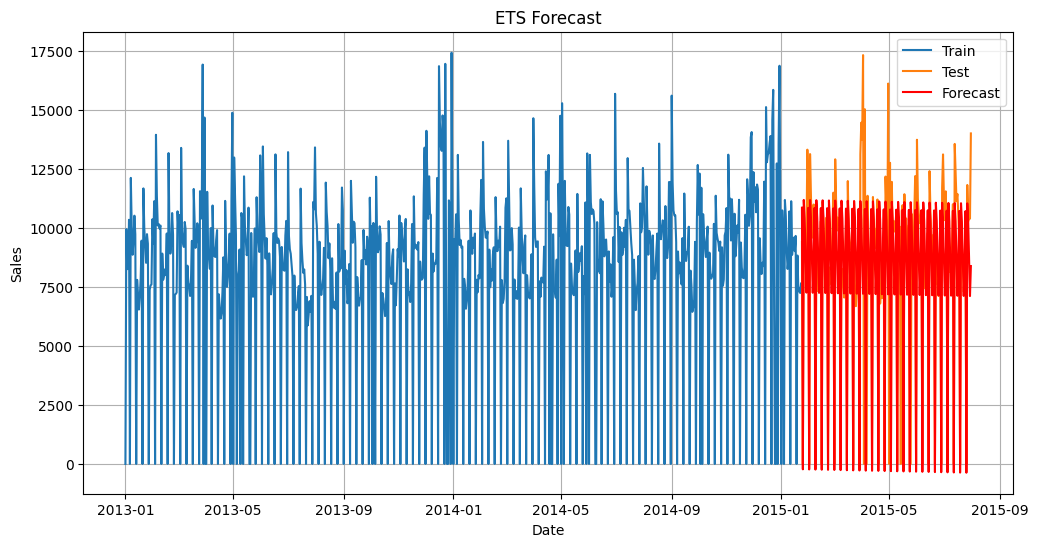

In [41]:
import matplotlib.pyplot as plt
# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(test_data.index, ets_forecast, label='Forecast', color='red')
plt.title('ETS Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Evaluate ETS model
ets_rmspe = rmspe(test_data['Sales'], ets_forecast)
print(f'ETS RMSPE: {ets_rmspe}')

ETS RMSPE: 0.19522219195268894
